In [141]:
!pip install scikit-learn

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import xgboost

In [143]:
df = pd.read_csv('/content/loan_data.csv')


In [144]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [146]:
df.select_dtypes(include = ['object']).dtypes

,0
person_gender,object
person_education,object
person_home_ownership,object
loan_intent,object
previous_loan_defaults_on_file,object


In [147]:
df.isna().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [148]:
df.dropna().isna().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [149]:
df.dropna().isna().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [150]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


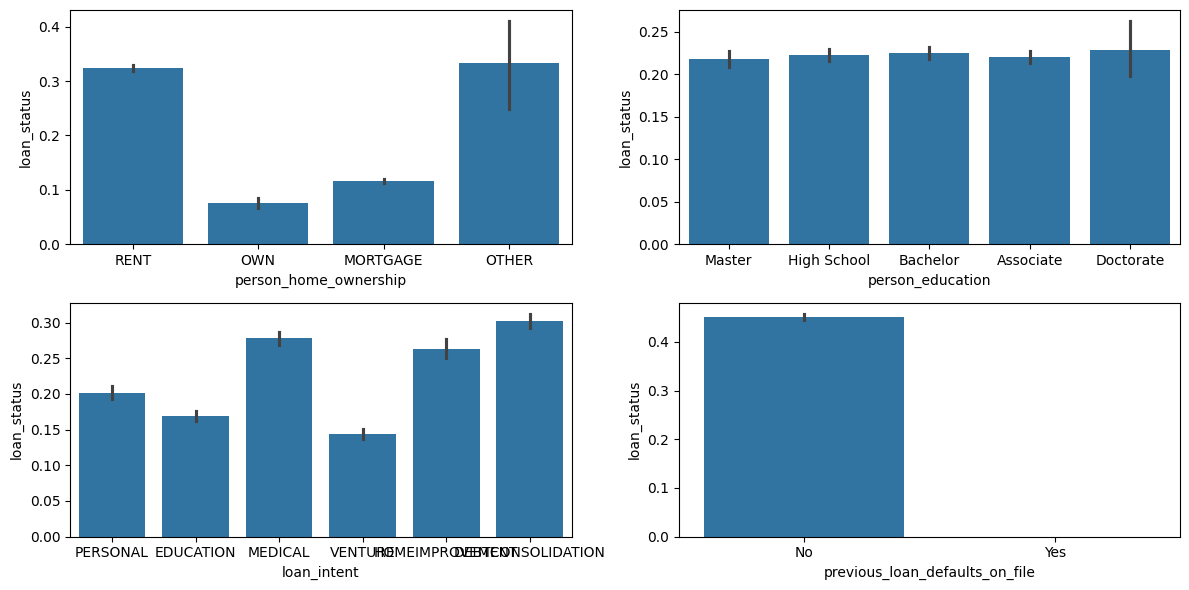

In [151]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))
sns.barplot(x=df['person_home_ownership'], y=df['loan_status'], ax=axes[0,0])
sns.barplot(x=df['person_education'], y=df['loan_status'], ax=axes[0,1])
sns.barplot(x=df['loan_intent'], y=df['loan_status'],ax=axes[1,0])
sns.barplot(x=df['previous_loan_defaults_on_file'], y=df['loan_status'], ax=axes[1,1])
plt.tight_layout()

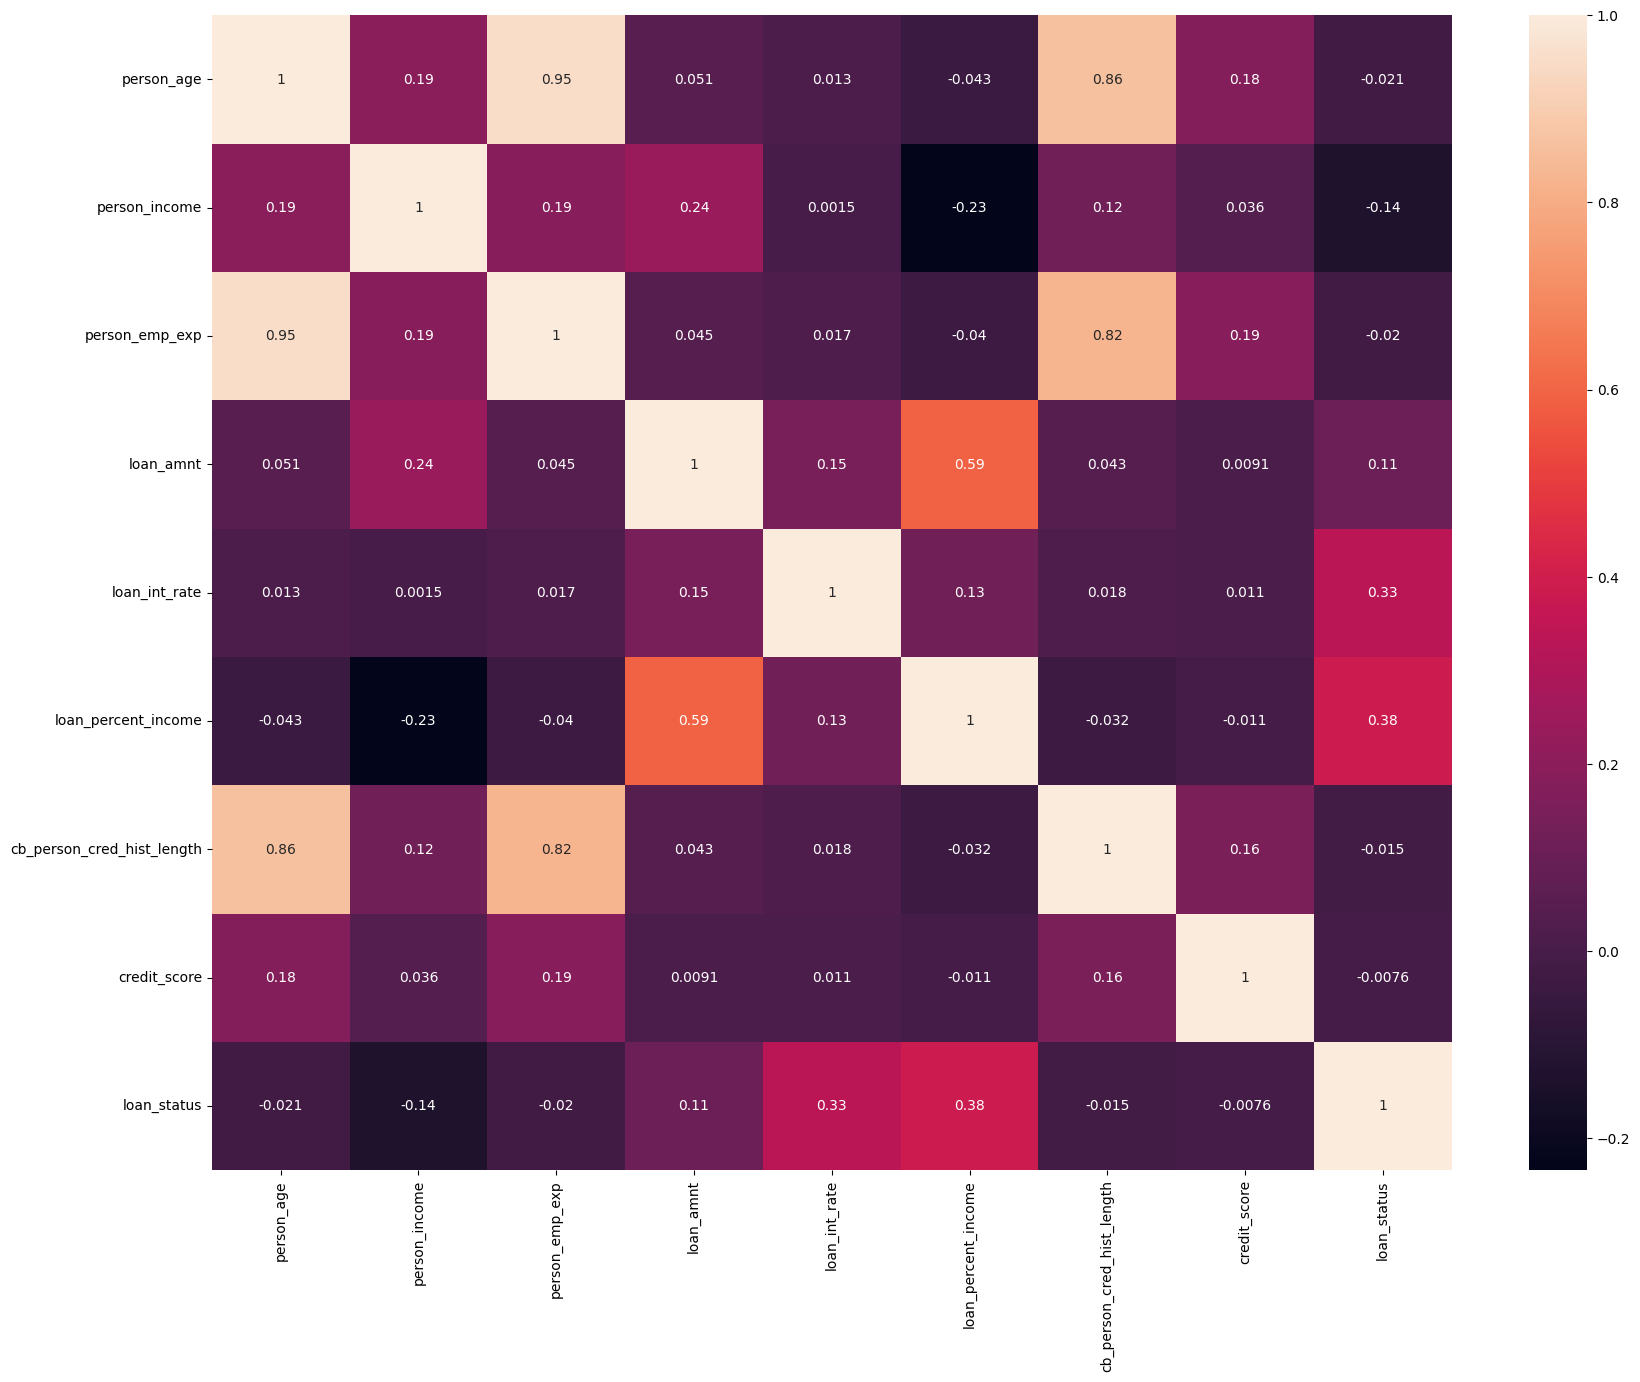

In [152]:
plt.figure(figsize=(20, 15))
# Calculate correlation only for numeric features
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, annot_kws={"size": 10})
plt.show()

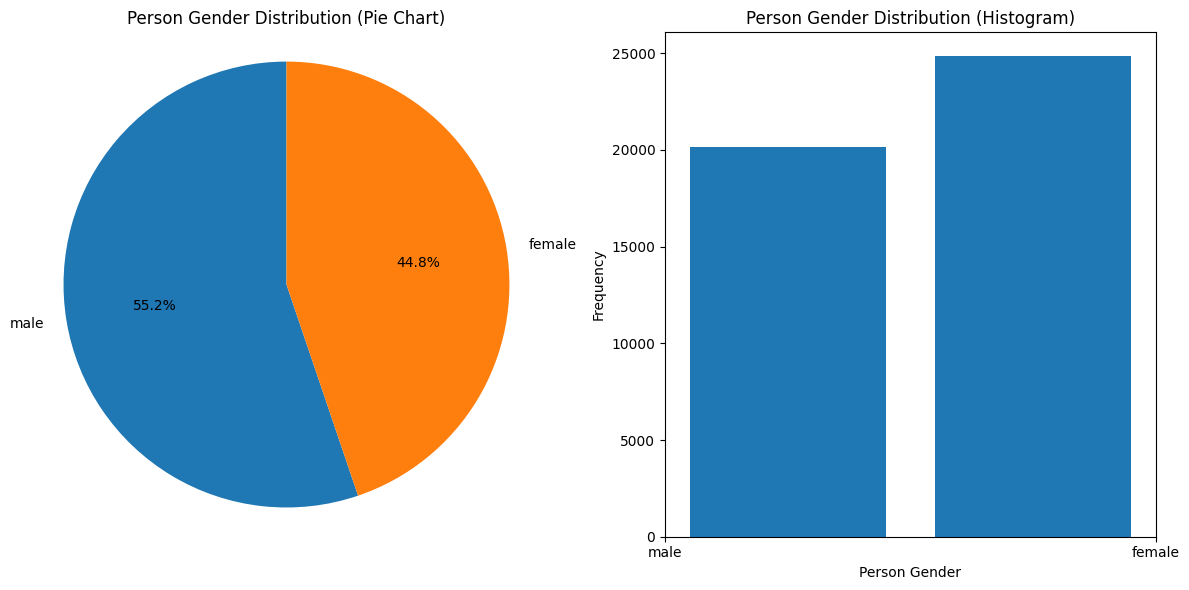

In [153]:
gender_counts = df['person_gender'].value_counts()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart
axes[0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Person Gender Distribution (Pie Chart)')
axes[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Histogram
axes[1].hist(df['person_gender'], bins=len(gender_counts.index), align='mid', rwidth=0.8) #bins equal to the number of unique genders
axes[1].set_xlabel('Person Gender')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Person Gender Distribution (Histogram)')
axes[1].set_xticks(range(len(gender_counts.index)))
axes[1].set_xticklabels(gender_counts.index)
plt.tight_layout() #adjusts spacing between subplots for better visualization

plt.show()

In [154]:
# Fit OneHotEncoder on training data
categorical_cols = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(df[categorical_cols])
# Transform training data
encoded_data_train = encoder.transform(df[categorical_cols])
encoded_data_train = pd.DataFrame(encoded_data_train, columns=encoder.get_feature_names_out(categorical_cols))
df = pd.concat([df, encoded_data_train], axis=1)
df.drop(categorical_cols, axis=1, inplace=True)

df

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_female,...,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_No,previous_loan_defaults_on_file_Yes
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,1,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,1,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,1,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,1,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,47971.0,6,15000.0,15.66,0.31,3.0,645,1,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
44996,37.0,65800.0,17,9000.0,14.07,0.14,11.0,621,1,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
44997,33.0,56942.0,7,2771.0,10.02,0.05,10.0,668,1,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
44998,29.0,33164.0,4,12000.0,13.23,0.36,6.0,604,1,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [155]:
from sklearn.model_selection import train_test_split
X = df.drop('loan_status', axis=1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [156]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((36000, 27), (36000,), (9000, 27), (9000,))

In [157]:
xgb = xgboost.XGBClassifier(
    objective='binary:logistic',  # Binary classification
    eval_metric='logloss',       # Evaluation metric for binary classification
    use_label_encoder=False,     # Avoids label encoding warnings
    max_depth=3,                 # Depth of trees
    learning_rate=0.1,           # Step size shrinkage
    n_estimators=100)            # Number of trees)

In [158]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Accuracy: {acc}')
print(f'Precision: {prec}')
print(f'Recall: {rec}')
print(f'F1 Score: {f1}')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:20:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9223333333333333
Precision: 0.8692957746478873
Recall: 0.7676616915422886
F1 Score: 0.8153236459709379


In [159]:
import joblib

joblib.dump(xgb, 'xgb_model.joblib')

['xgb_model.joblib']

In [160]:
loaded_model = joblib.load('xgb_model.joblib')